# Bitcoins time series
## Time Series Analysis

# Exploratory data analysis
# Разведочный анализ данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lib.plotmd import plotVector

In [2]:
def plotDescriptives(X,percents,maxX):
    meanAdded=False
    stats=[]
    ticks=["Min"]
    stats.append(X.min())
    mean=X.mean()
    
    for p in percents:
        val=X.quantile(p)
        if (not meanAdded and val>mean):
            ticks.add('Mean')
            meanAdded=True
            stats.append(mean)   
        ticks.append(p)
        stats.append(val)
    ticks.append("Max")
    stats.append(X.max())
    for s in stats:
        plt.plot([0,maxX],[s,s])
    

In [3]:
def anti_trendsingleStep(X,w,k):
    if len(X[max(k-w,0):k+1])==0:
        print w,k
    return X[max(k-w,0):k+1].mean()
def anti_trend(X,w):
    N=X.shape[0]
    return np.array([anti_trendsingleStep(X,w,k) for k in range(N-1)])

In [4]:
data = pd.read_csv(filepath_or_buffer="data/bitcoin_price.csv")
data=data.reindex(index=data.index[::-1])

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1654,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1653,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1652,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1651,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1650,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [6]:
data.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 1654 to 0
Data columns (total 7 columns):
Date          1655 non-null object
Open          1655 non-null float64
High          1655 non-null float64
Low           1655 non-null float64
Close         1655 non-null float64
Volume        1655 non-null object
Market Cap    1655 non-null object
dtypes: float64(4), object(3)
memory usage: 90.6+ KB


In [8]:
data.describe()

,Open,High,Low,Close
count,1655.000000,1655.000000,1655.000000,1655.000000
mean,822.136127,845.812665,800.640906,826.285541
std,1108.245793,1147.157863,1077.408893,1119.053510
min,68.500000,74.560000,65.530000,68.430000
25%,263.850000,270.070000,260.030000,264.135000
50%,453.380000,458.200000,444.960000,453.380000
75%,743.485000,759.425000,731.785000,744.820000
max,7404.520000,7617.480000,7333.190000,7407.410000


[]

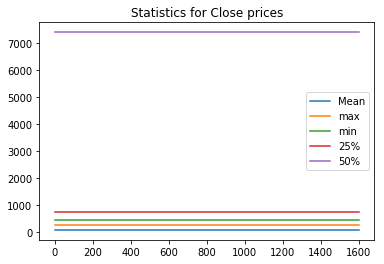

In [9]:
plotDescriptives(data.Close,[.25,.5,.75],1600)
plt.legend(["Mean","max","min","25%","50%","75%"])
plt.title("Statistics for Close prices")
plt.plot()

In [10]:
from lib.statsmd import getStatistics,printStatsReport
stats=getStatistics(data.Close)
printStatsReport(stats)

xmean=826.285541
ck=1934271.888976
ck0=1390.781036
D=1251524.094065
c0=1118.715377
M3=4300183271.732272
gama1=3.071342
M4=20308239816462.488281
gama2=9.965637


In [11]:
#from lib.plotmd import plotDistribution
#plotDistribution(data.Close,"Distribution of the function")
#plt.plot()

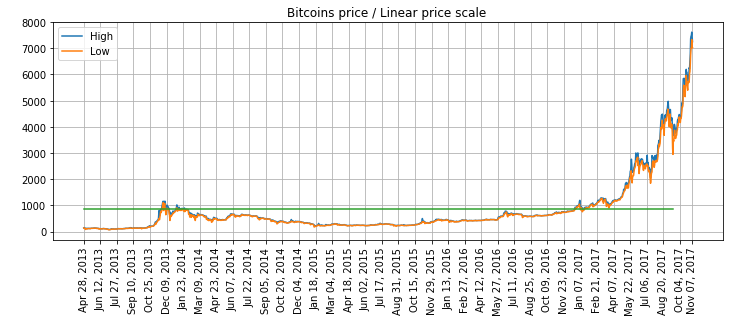

In [12]:
import matplotlib.pyplot as plt
meanHigh=data.High.mean()

xind=range(0,len(data),45)
xind.append(len(data)-1)
plt.figure(figsize=(12,4))
plotVector(data.High.as_matrix()," "," "," ")
plotVector(data.Low.as_matrix()," "," "," ")
plt.plot([0,1600],[meanHigh,meanHigh])
plt.xticks(xind,data.Date.as_matrix()[xind],rotation=90)
plt.grid()
plt.title("Bitcoins price / Linear price scale ")
plt.legend(["High","Low"])
plt.show()

## Log scale
https://www.investopedia.com/ask/answers/05/logvslinear.asp#ixzz4pKMuY5HA

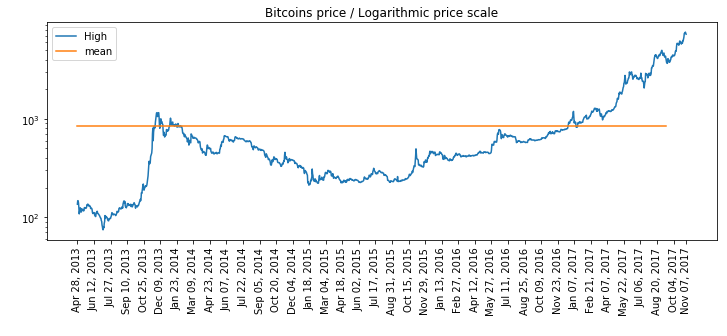

In [29]:
xind=range(0,len(data),45)
xind.append(len(data)-1)
plt.figure(figsize=(12,4))
plotVector(data.High.as_matrix()," "," "," ")
#plotVector(data.Low.as_matrix()," "," "," ")
plt.plot([0,1600],[meanHigh,meanHigh])
plt.xticks(xind,data.Date.as_matrix()[xind],rotation=90)
plt.grid()
plt.yscale('log')
plt.title("Bitcoins price / Logarithmic price scale")
plt.legend(["High","mean"])
plt.show()

# Anti trend

In [14]:
X=data.High.as_matrix()

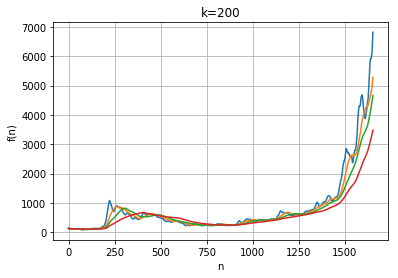

In [15]:
for k in [10,50,100,200]:
    line=anti_trend(X,k)
    plotVector(line,"k={}".format(k),"n","f(n)")
plt.grid()
plt.show()

## Exponentially weighted moving averages

$V(t)=\beta*V(t-1)+(1-\beta)*(\theta(t))$

In [16]:
def cal_expWeiAvg(X,B):
    ewma=[X[0]]
    for i in range(1,len(X)):
        vt=B*ewma[i-1]+(1-B)*X[i]
        ewma.append(vt)
    return ewma

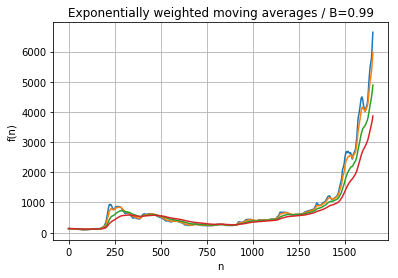

In [17]:
B=0.9
for B in [0.9,0.95,0.98,0.99]:
    ewma=cal_expWeiAvg(X,B)
    plotVector(ewma,"Exponentially weighted moving averages / B={}".format(B).format(k),"n","f(n)")
plt.grid()
plt.show()

## Some features of the line :
### results
- at first few months the line tends to have slight increase
- Significant increase over time in the period between 
- The next period , the trend tends to decrease slightly over time until.
- the period , the trend tends to increase slightly 
- Exponentially-like (Huge) increase in the trend after till now

- there is no seasonality in the data 
- there is no obvious outliers
- The variance is not constant over time

## AR(1)

we use a linear model to predict the value at the present time using the value at the previous time.  This is called an AR(1) model, standing for autoregressive model of order 1.  The order of the model indicates how many previous times we use to predict the present time.

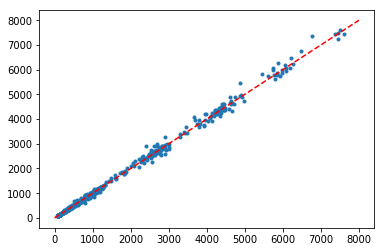

In [27]:
plt.scatter(X[:-1],X[1:],marker='.')
plt.plot([0,8000],[0,8000],'r--')
plt.show()

## Autocorrelation

An	autocorrelation	plot	shows	the	properties	of	a	type	of	data	known	as	a	time	series.

An	autocorrelation	plot	is	designed	to	show	whether	the	elements	of	a	time	series	are
positively	correlated,	negatively	correlated,	or	independent	of	each	other.

An	autocorrelation	plot	shows	the	value	of	the	autocorrelation	function	(acf)	on	the
vertical	axis.	It	can	range	from	–1	to	1

The	horizontal	axis	of	an	autocorrelation	plot	shows	the	size	of	the	lag	between	the
elements	of	the	time	series.	For	example,	the	autocorrelation	with	lag	2	is	the
correlation	between	the	time	series	elements	and	the	corresponding	elements	that	were
observed	two	time	periods	earlier.

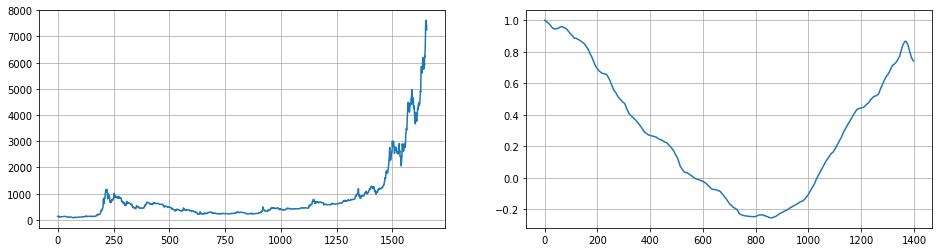

In [25]:
from lib.statsmd import autocorr,Rxx
X=X.reshape(X.shape[0],1)
L=1400
corr=autocorr(X,L)
plt.figure(figsize=(16,4))
plt.subplot(121)
plotVector(X,"","","")
plt.subplot(122)
plotVector(corr,"","","")
plt.show()

the	spikes	are	statistically	significant	for	lags	up	to	400.	This	means	that
the	bitcoin	prices	are	highly	correlated	with	each	other.	In	other	words,	when	the
price	of	Apple	stock	rises,	it	tends	to	continue	rising.	When	the	price	of	Apple	stock
falls,	it	tends	to	continue	falling.

Even	though	the	daily	prices	of	bitcoins	are	highly	correlated,	the	daily	returns	may
not	be.	You	compute	the	daily	returns	from	the	daily	prices	as	follows:

$r_t=\ln(P_t\div P_{t-1})$

where
- $r_t$ 	=	The	continuously	compounded	return	at	time	t
- $P_t$ 	=	The	price	at	time	t
- $P_{t-1}$ 	=	The	price	at	time	t	–	1	(one	period	before	t)
- $ln$	=	The	natural	logarithm

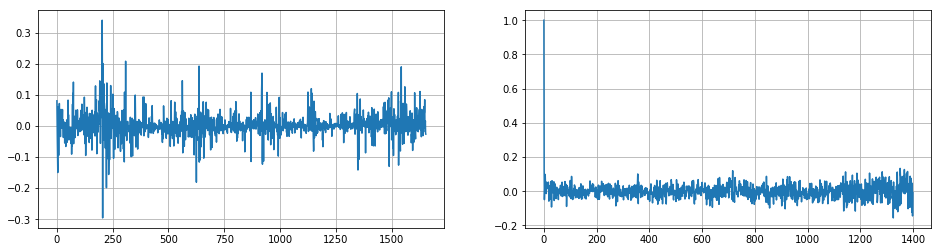

In [26]:
r=np.array([np.log((1.0*X[i])/X[i-1]) for i in range(1,len(X))])
corr_r=autocorr(r,L)
plt.figure(figsize=(16,4))
plt.subplot(121)
plotVector(r,"","","")
plt.subplot(122)
plotVector(corr_r,"","","")
plt.show()

The	autocorrelation	plot	for	daily	returns	to	bitcoins prices	shows	that	most	of	the	spikes
are	not	statistically	significant.	This	indicates	that	the	returns	are	not	highly	correlated

## Spectrum analysis

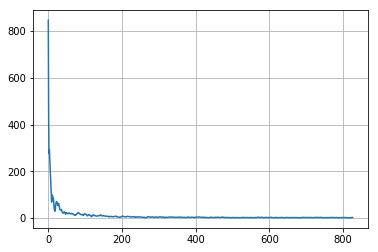

In [22]:
from lib.helpersmd import fourierTransform
N=len(X)
cn=fourierTransform(X,N)[:N/2]
plotVector(cn,"","","")
plt.show()

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


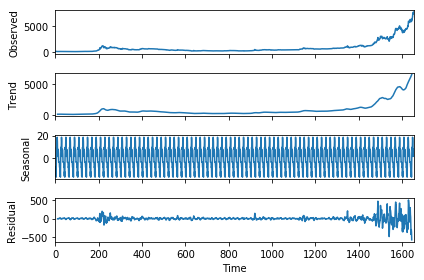

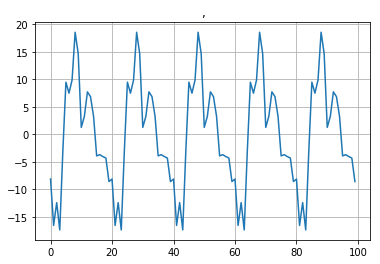

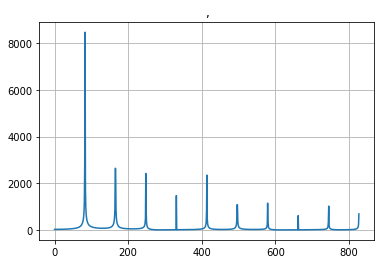

In [23]:

from random import randrange
from pandas import tseries
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = X
result = seasonal_decompose(series, model='additive', freq=20)
result.plot()
pyplot.show()

#from lib.helpersmd import fourierTransform
N=len(result.seasonal)
#CN=fourierTransform(result.seasonal,N)
fft=np.fft.fft(result.seasonal)[:N/2+1]
CN=np.sqrt(np.power(np.real(fft),2)+np.power(np.imag(fft),2))

plt.figure()
plotVector(result.seasonal[:100],",","","")
plt.figure()
plotVector(CN,",","","")
plt.show()
